In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import requests
import math
from pathlib import Path
from sklearn.linear_model import LinearRegression
import time
import os

### Data Cleaning

In [ ]:
# step 1: pull the CSV files into separate DataFrames and store them in a dictionary
stocks_dict = {}
stocks_path = "Stocks"

for stocknamefile in os.listdir(stocks_path):
    if stocknamefile.endswith('.csv'):
        stock_name = os.path.splitext(stocknamefile)[0]
        stocksdf = pd.read_csv(os.path.join(stocks_path, stocknamefile))
        # Add a new column with the stock name
        stocksdf['Stock Name'] = stock_name
        stocks_dict[stock_name] = stocksdf

# Step 2: Concatenate all DataFrames into a single DataFrame
stocksmerged_df = pd.concat(stocks_dict.values(), ignore_index=True)

# Step 3: Drop the 'Dividends' and 'Stock Splits' columns
stocksmerged_df.drop(columns=['Dividends', 'Stock Splits', 'Adj Close', 'Capital Gains'], inplace=True)

stocksmerged_df

### Price Change Analysis

In [6]:
# Step 4: Convert 'Date' column to datetime with timezone information
stocksmerged_df['Date'] = pd.to_datetime(stocksmerged_df['Date'], utc=True)

# Step 5: Filter data to only include rows from 2015
stocksmerged_df = stocksmerged_df[stocksmerged_df['Date'].dt.year >= 2015]

# Step 6: Calculate the percentage change in price over time for each stock
stocksmerged_df['Percentage Change'] = stocksmerged_df.groupby('Stock Name')['Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Step 7: Create a new DataFrame to store the results
Price_change_df = pd.DataFrame({
    'Stock Name': stocksmerged_df['Stock Name'].unique(),
    'Percentage Change': stocksmerged_df.groupby('Stock Name')['Percentage Change'].last()
})

# Step 8: Filter the stocks based on the percentage change in price
Price_change_df = Price_change_df[
    (Price_change_df['Percentage Change'] <= 200) & (Price_change_df['Percentage Change'] >= -200)
]

# Step 9: Sort the remaining stocks based on the percentage change in price
Price_change_df = Price_change_df.sort_values(by='Percentage Change', ascending=False)

# Reset the index of the result DataFrame
Price_change_df.reset_index(drop=True, inplace=True)
Price_change_df.head(20)

/var/folders/zt/vtp53nbj2b14l2_96t_sg2bh0000gn/T/ipykernel_3535/3763841138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocksmerged_df['Date'] = pd.to_datetime(stocksmerged_df['Date'], utc=True)


,Stock Name,Percentage Change
0,KRBP,199.521695
1,FT,199.250892
2,VERA,199.203198
3,PB,198.634805
4,DUOL,198.328699
5,SAT,198.303067
6,NNDM,198.044922
7,TEVA,197.858657
8,MEGL,197.766997
9,FRT,197.690027


### Creation of the Scatter Plotts and the lineal correlation line and equation.

Equation of the Linear Correlation for KRBP: y = -0.5312x + 271.7187
Future Price of KRBP after one year from 2023-05-23 04:00:00+00:00: -269.53
Difference in Price after one year: -273.59


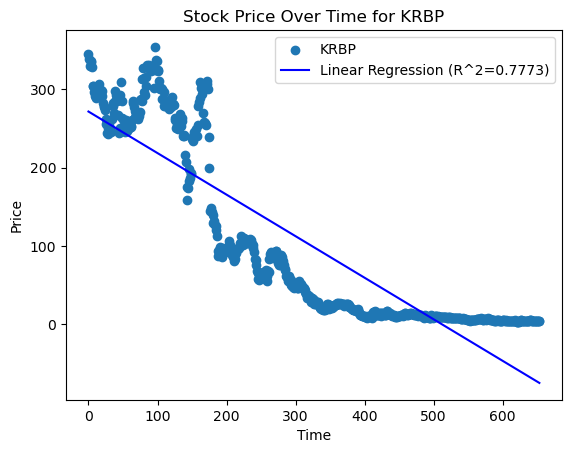

Equation of the Linear Correlation for FT: y = 0.0017x + 3.6731
Future Price of FT after one year from 2023-05-23 04:00:00+00:00: 7.92
Difference in Price after one year: 1.22


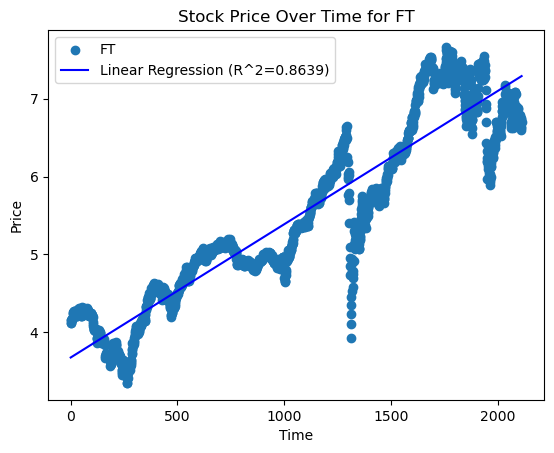

Equation of the Linear Correlation for VERA: y = -0.0209x + 22.1049
Future Price of VERA after one year from 2023-05-23 04:00:00+00:00: 3.79
Difference in Price after one year: -4.27


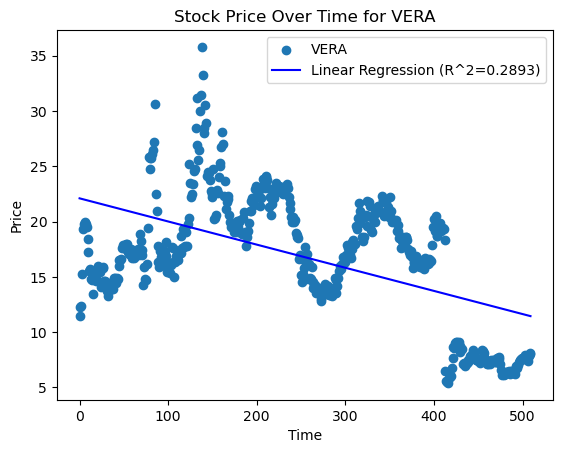

Equation of the Linear Correlation for PB: y = 0.0136x + 43.7894
Future Price of PB after one year from 2023-05-23 04:00:00+00:00: 77.37
Difference in Price after one year: 17.27


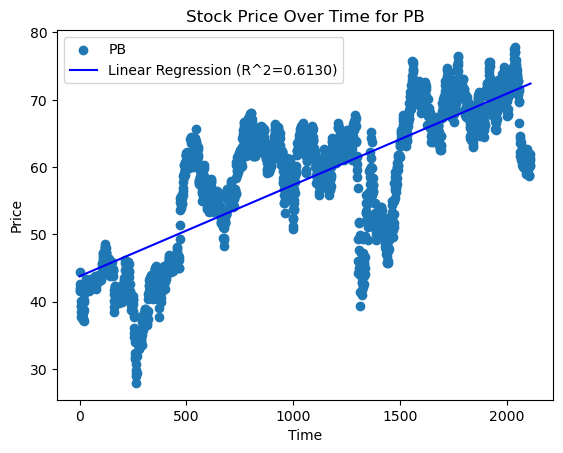

Equation of the Linear Correlation for DUOL: y = -0.0769x + 125.1580
Future Price of DUOL after one year from 2023-05-23 04:00:00+00:00: 61.79
Difference in Price after one year: -87.48


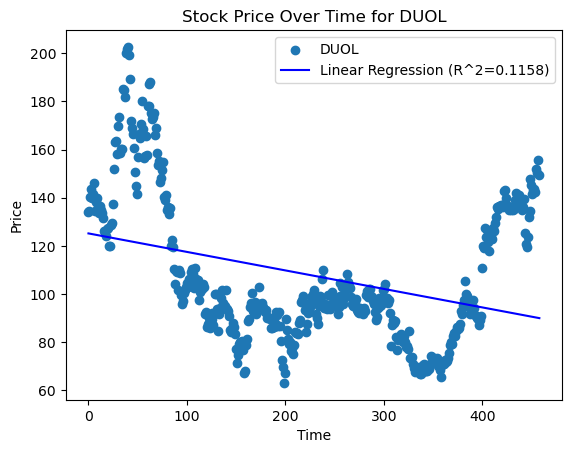

Equation of the Linear Correlation for SAT: y = -0.0046x + 23.7521
Future Price of SAT after one year from 2023-05-23 04:00:00+00:00: 20.85
Difference in Price after one year: -2.10


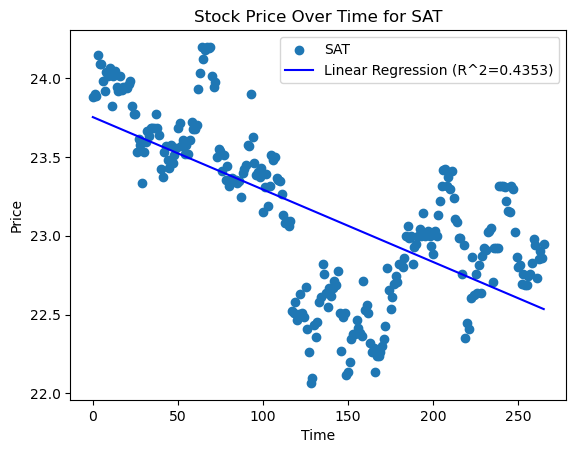

Equation of the Linear Correlation for NNDM: y = -0.0406x + 58.1546
Future Price of NNDM after one year from 2023-05-23 04:00:00+00:00: -30.36
Difference in Price after one year: -32.81


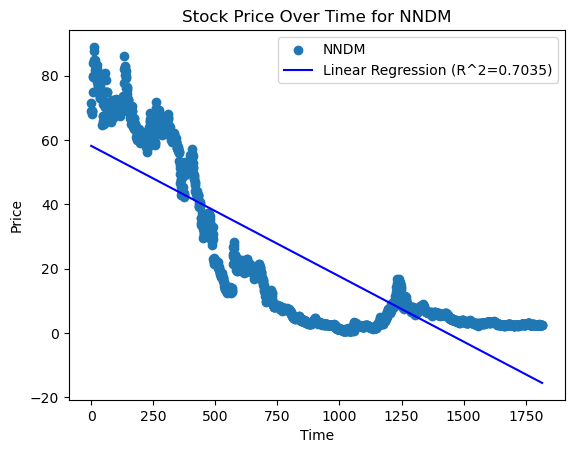

Equation of the Linear Correlation for TEVA: y = -0.0259x + 50.7164
Future Price of TEVA after one year from 2023-05-23 04:00:00+00:00: -13.40
Difference in Price after one year: -21.09


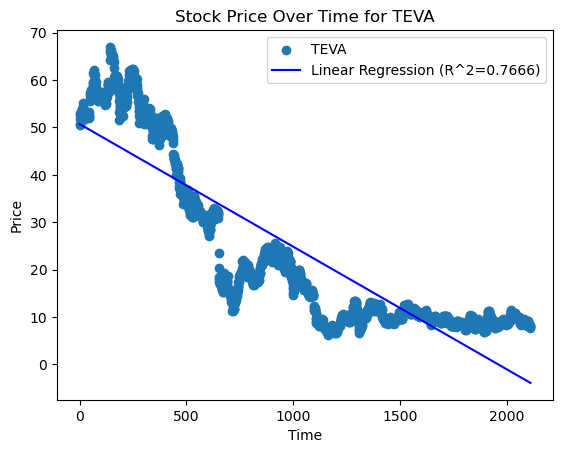

Equation of the Linear Correlation for MEGL: y = -0.0613x + 10.2924
Future Price of MEGL after one year from 2023-05-23 04:00:00+00:00: -24.39
Difference in Price after one year: -26.39


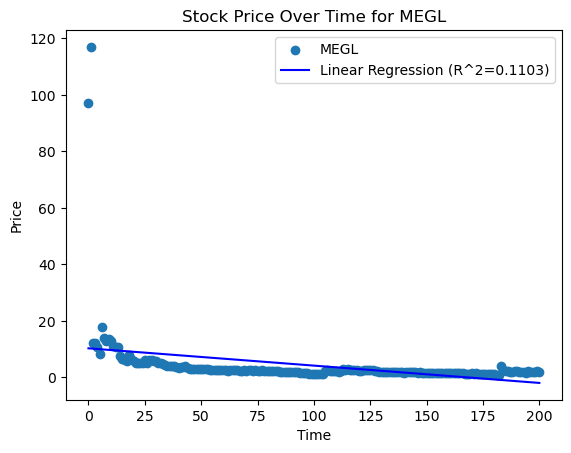

Equation of the Linear Correlation for FRT: y = -0.0060x + 110.5521
Future Price of FRT after one year from 2023-05-23 04:00:00+00:00: 95.76
Difference in Price after one year: 6.38


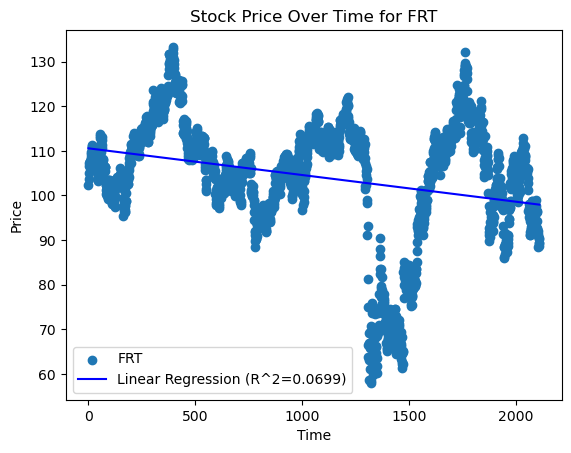

Equation of the Linear Correlation for ERC: y = 0.0021x + 5.8739
Future Price of ERC after one year from 2023-05-23 04:00:00+00:00: 11.17
Difference in Price after one year: 2.44


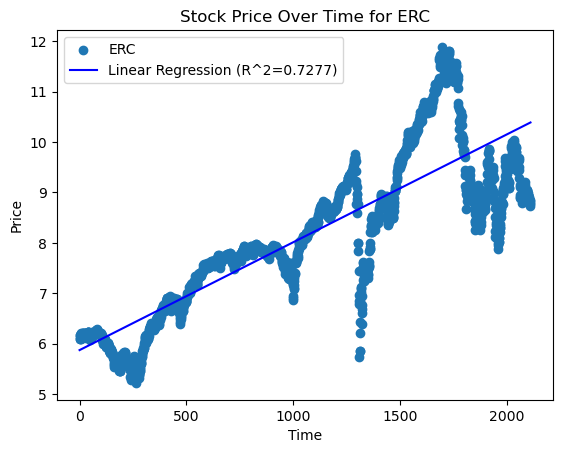

Equation of the Linear Correlation for BLNG: y = 0.0010x + 9.6563
Future Price of BLNG after one year from 2023-05-23 04:00:00+00:00: 10.45
Difference in Price after one year: 0.26


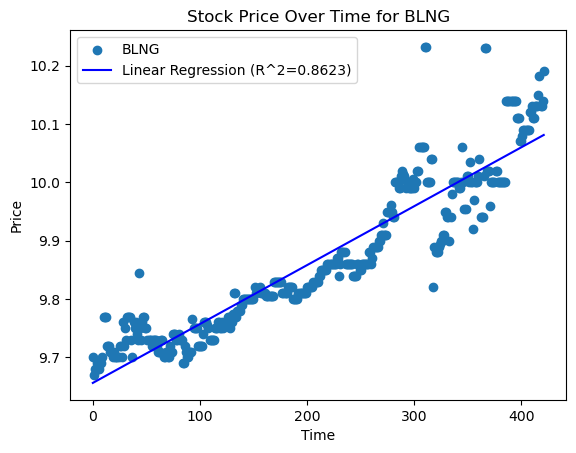

Equation of the Linear Correlation for ELP: y = 0.0022x + 1.4537
Future Price of ELP after one year from 2023-05-23 04:00:00+00:00: 6.97
Difference in Price after one year: -0.46


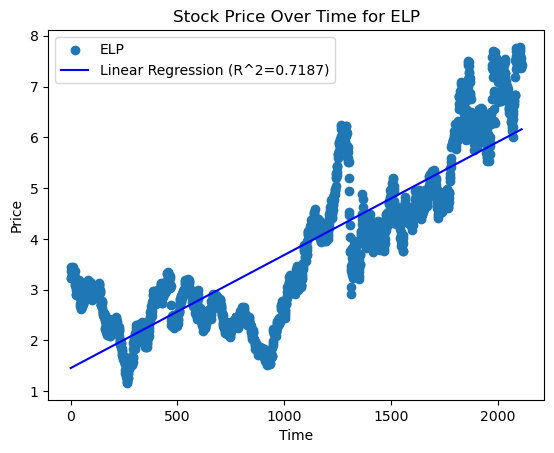

Equation of the Linear Correlation for SG: y = -0.0739x + 32.3792
Future Price of SG after one year from 2023-05-23 04:00:00+00:00: -22.63
Difference in Price after one year: -32.07


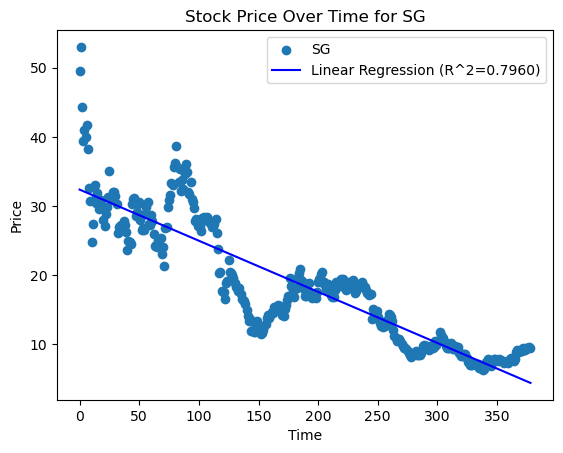

Equation of the Linear Correlation for BTE: y = -0.0027x + 6.5578
Future Price of BTE after one year from 2023-05-23 04:00:00+00:00: -0.05
Difference in Price after one year: -3.51


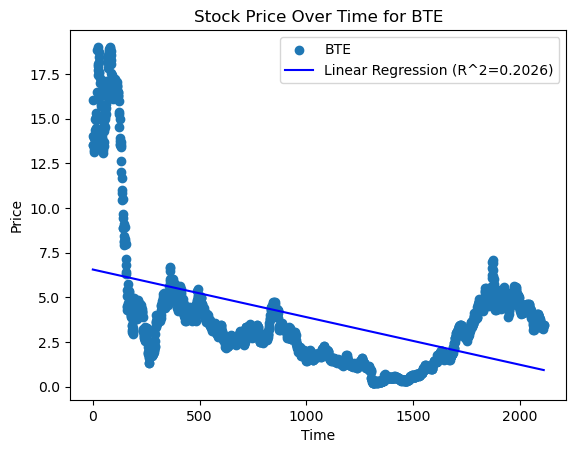

Equation of the Linear Correlation for INDI: y = -0.0031x + 10.9330
Future Price of INDI after one year from 2023-05-23 04:00:00+00:00: 6.91
Difference in Price after one year: -2.36


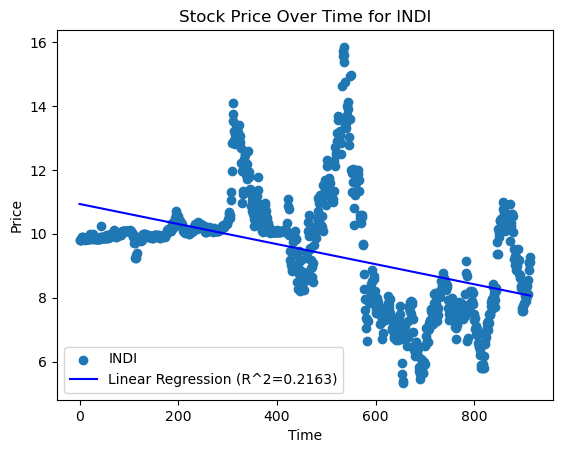

Equation of the Linear Correlation for INTT: y = 0.0039x + 3.0975
Future Price of INTT after one year from 2023-05-23 04:00:00+00:00: 12.83
Difference in Price after one year: -8.25


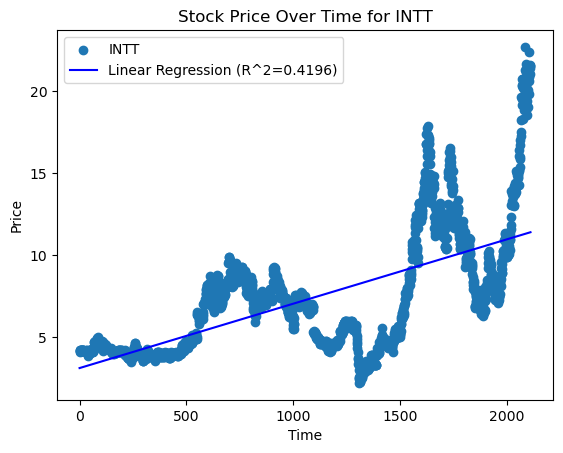

Equation of the Linear Correlation for KMX: y = 0.0247x + 53.3025
Future Price of KMX after one year from 2023-05-23 04:00:00+00:00: 114.58
Difference in Price after one year: 42.60


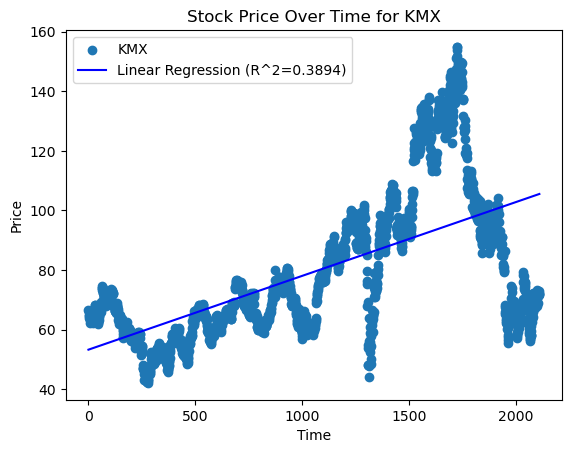

Equation of the Linear Correlation for HQI: y = 0.0071x + 1.5237
Future Price of HQI after one year from 2023-05-23 04:00:00+00:00: 19.05
Difference in Price after one year: -5.77


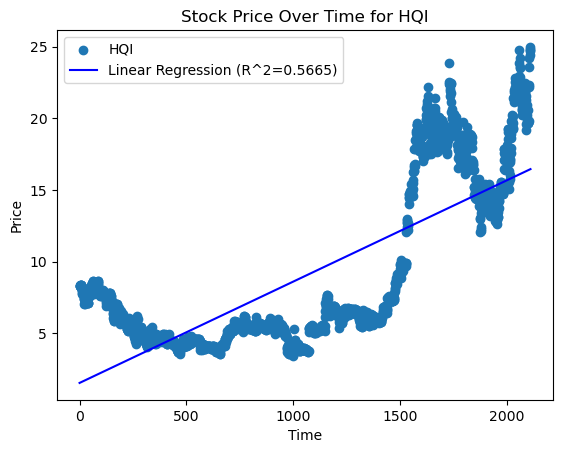

Equation of the Linear Correlation for EE: y = -0.0130x + 25.7559
Future Price of EE after one year from 2023-05-23 04:00:00+00:00: 17.41
Difference in Price after one year: -2.48


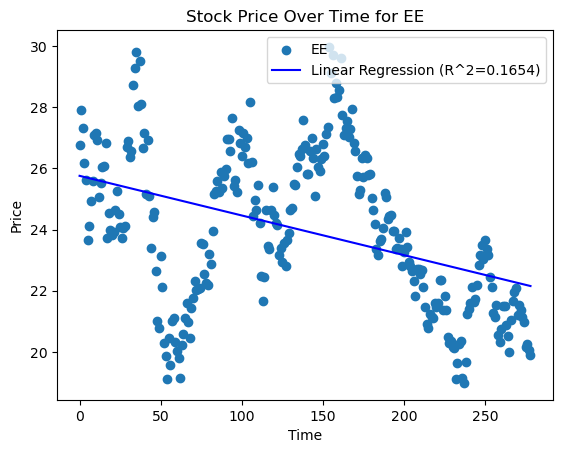

In [7]:
# Step 10: Get the names of the top 20 stocks with the highest percentage change
top_5_stocks = Price_change_df.head(20)['Stock Name'].tolist()

# Step 11: Create scatter plots with linear correlation lines for the top 5 stocks
for stock_name in top_5_stocks:
    stock_data = stocksmerged_df[stocksmerged_df['Stock Name'] == stock_name]
    x = np.arange(len(stock_data))
    y = stock_data['Close']

    plt.scatter(x, y, label=stock_name)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'Stock Price Over Time for {stock_name}')
    
    # Calculate the linear regression
    coefficients = np.polyfit(x, y, 1)
    linear_regression = np.poly1d(coefficients)
    
    # Calculate the R-squared value
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value ** 2
    
    # Create the linear correlation line
    plt.plot(x, linear_regression(x), color='blue', label=f'Linear Regression (R^2={r_squared:.4f})')
    
    # Calculate the potential price for one year in the future (assuming 365 days in a year)
    last_date = stock_data['Date'].iloc[-1]
    days_in_one_year = 365
    future_date = last_date + pd.DateOffset(days=days_in_one_year)
    potential_price_one_year = linear_regression(len(stock_data) + days_in_one_year)
    
    # Print the equation of the linear correlation line
    slope, intercept = coefficients
    print(f"Equation of the Linear Correlation for {stock_name}: y = {slope:.4f}x + {intercept:.4f}")
    
    # Calculate the difference in price between the last data point and the calculated future price after one year
    last_price = stock_data['Close'].iloc[-1]
    price_difference = potential_price_one_year - last_price
    print(f"Future Price of {stock_name} after one year from {last_date}: {potential_price_one_year:.2f}")
    print(f"Difference in Price after one year: {price_difference:.2f}")
    
    plt.legend()
    plt.show()

### Stats Analysis

In [8]:
# Step 12: Calculate the changes in price per day ('Close' minus 'Open') from 2015 onwards
stocksmerged_df['Price Change per Day'] = stocksmerged_df.apply(lambda row: row['Close'] - row['Open'], axis=1)

# Step 13: Create a new DataFrame to store the statistics summary
stats_summary_df = stocksmerged_df.groupby('Stock Name')['Price Change per Day'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Step 14: Calculate the R-squared score for each stock
r_squared_scores = stocksmerged_df.groupby('Stock Name').apply(lambda df: stats.linregress(np.arange(len(df)), df['Close'])[2] ** 2)
stats_summary_df['R-squared'] = r_squared_scores

# Step 15: Sort the stocks based on the R-squared (descending order)
sorted_stocks = stats_summary_df.sort_values(by='R-squared', ascending=False)

# Step 15.1: Show the ranked DataFrame from lowest variance to highest variance
ranked_stats_summary_df = sorted_stocks.reset_index()
ranked_stats_summary_df


,Stock Name,mean,median,var,std,sem,R-squared
0,LAESV,-5.345500,-5.3455,299.904545,17.317752,12.245500,1.000000e+00
1,WKEYV,0.070000,0.0700,1.185800,1.088945,0.770000,1.000000e+00
2,ASCB,-0.003447,0.0000,0.002047,0.045240,0.002884,9.797331e-01
3,CHEA,-0.001189,0.0000,0.000369,0.019218,0.001273,9.779051e-01
4,EMCG,-0.009062,0.0000,0.003839,0.061959,0.004868,9.760287e-01
...,...,...,...,...,...,...,...
6799,VS,-0.048205,0.0000,9.314776,3.052012,0.066411,3.277775e-07
6800,PGYWW,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000e+00
6801,LIFWW,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000e+00
6802,WEJOW,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000e+00


### Box plots

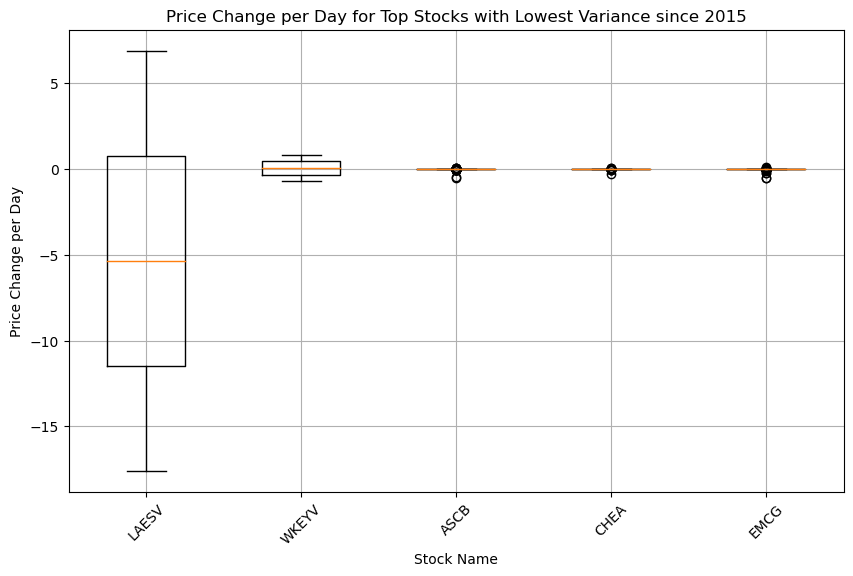

In [9]:
# Step 16: Get the names of the top stocks with the lowest variance
top_stocks_lowest_std = ranked_stats_summary_df.head(5)['Stock Name'].tolist()

# Step 17: Create box plots for the top stocks with the lowest std
plt.figure(figsize=(10, 6))
plt.boxplot([stocksmerged_df[stocksmerged_df['Stock Name'] == stock]['Price Change per Day'] for stock in top_stocks_lowest_std], labels=top_stocks_lowest_std)
plt.xlabel('Stock Name')
plt.ylabel('Price Change per Day')
plt.title('Price Change per Day for Top Stocks with Lowest Variance since 2015')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Final Summary to choose Stocks

In [10]:
# Step 18: Merge Price_change_df with stats_summary_df on 'Stock Name'
merged_df = pd.merge(Price_change_df, stats_summary_df, on='Stock Name')

# Step 19: Sort the merged DataFrame based on percentage change in descending order
merged_df = merged_df.sort_values(by='Percentage Change', ascending=False)

# Step 20: Create a new DataFrame with the desired columns
final_df = merged_df[['Stock Name', 'Percentage Change', 'R-squared', 'std']]

# Reset the index of the result DataFrame
final_df.reset_index(drop=True, inplace=True)

# Step 21: Display the first 20 stocks in the final DataFrame with ranking
print(final_df.head(20))

   Stock Name  Percentage Change  R-squared        std
0        KRBP         199.521695   0.777296   7.451044
1          FT         199.250892   0.863861   0.050144
2        VERA         199.203198   0.289282   1.111098
3          PB         198.634805   0.613032   0.940798
4        DUOL         198.328699   0.115763   4.798298
5         SAT         198.303067   0.435262   0.153743
6        NNDM         198.044922   0.703539   0.894280
7        TEVA         197.858657   0.766637   0.541847
8        MEGL         197.766997   0.110312  10.320399
9         FRT         197.690027   0.069853   1.429139
10        ERC         197.611464   0.727665   0.070343
11       BLNG         197.521945   0.862267   0.057042
12        ELP         197.462602   0.718670   0.078528
13         SG         197.143198   0.795974   1.341522
14        BTE         196.698977   0.202557   0.183006
15       INDI         196.617938   0.216308   0.265628
16       INTT         196.030973   0.419647   0.269102
17        

In [14]:

# Define the Finnhub API endpoint
API_URL = "https://finnhub.io/api/v1/quote"

# API key 
API_KEY = 'cj00oe9r01qlkaevussgcj00oe9r01qlkaevust0'

# Store the live prices in a dictionary
live_prices = {}


top_5_price_gains = Price_change_df.head(5)['Stock Name'].tolist()
top_5_lowest_std = ranked_stats_summary_df.head(5)['Stock Name'].tolist()
top_5_gains_lowest_std = merged_df.head(5)['Stock Name'].tolist()

# Combine all lists and get unique stock symbols
unique_stock_symbols = list(set(top_5_price_gains + top_5_lowest_std + top_5_gains_lowest_std))

# Iterate over the unique stock symbols
for stock_symbol in unique_stock_symbols:
    try:
        # Prepare the request parameters
        params = {
            'symbol': stock_symbol,
            'token': API_KEY
        }

        # Make the API request
        response = requests.get(API_URL, params=params)

        # Check the response status code
        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()
            
            # Extract the current price
            current_price = data['c']
            
            # Store the current price in the dictionary
            live_prices[stock_symbol] = current_price
            
            print(f"Current price of {stock_symbol}: {current_price}")

        else:
            print(f"API request failed with status code {response.status_code}.")
            
    except Exception as e:
        print(f"An error occurred: {e}")

    # Pause to avoid hitting the rate limit
    time.sleep(1)

# Convert the dictionary to a DataFrame
live_prices_df = pd.DataFrame(list(live_prices.items()), columns=['Stock Name', 'Live Price'])

# Display the DataFrame
live_prices_df

# Create a dictionary to store the potential prices for the top 5 stocks after one year
potential_prices_dict = {}

# Rerunning the predictions for the top 5 stocks
for stock_name in top_5_stocks:
    stock_data = stocksmerged_df[stocksmerged_df['Stock Name'] == stock_name]
    x = np.arange(len(stock_data))
    y = stock_data['Close']

    # Calculate the linear regression
    coefficients = np.polyfit(x, y, 1)
    linear_regression = np.poly1d(coefficients)

    # Calculate the potential price for one year in the future (assuming 365 days in a year)
    last_date = stock_data['Date'].iloc[-1]
    days_in_one_year = 365
    potential_price_one_year = linear_regression(len(stock_data) + days_in_one_year)
    
    # Store the potential price in the dictionary
    potential_prices_dict[stock_name] = potential_price_one_year

# Then use the `potential_prices_dict` for the comparison block

for stock_name in unique_stock_symbols:
    if stock_name in live_prices and stock_name in potential_prices_dict:
        predicted_price = potential_prices_dict[stock_name]
        actual_price = live_prices[stock_name]

        plt.figure(figsize=(10, 6))
        plt.bar(['Predicted', 'Actual'], [predicted_price, actual_price], color=['blue', 'orange'])
        plt.title(f'Predicted vs Actual Price for {stock_name}')
        plt.ylabel('Price')
        plt.show()

NameError: name 'Price_change_df' is not defined